### SVC Implementation

In [32]:
import pandas as pd 
import numpy as np 
import seaborn as snb 
import matplotlib.pyplot as plt 
%matplotlib inline

In [33]:
from sklearn.datasets import make_classification

In [34]:
X,Y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_clusters_per_class=2, n_redundant=0)

In [35]:
X = pd.DataFrame(X, columns=["df1", "df2"])

<Axes: xlabel='df1', ylabel='df2'>

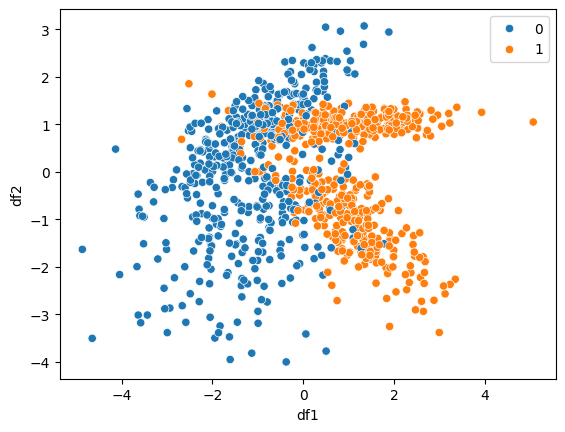

In [36]:
snb.scatterplot(x=X["df1"], y=X["df2"], hue=Y)

In [37]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=10, test_size=0.25)

In [39]:
model = SVC(kernel="linear")

In [40]:
rbf = SVC(kernel="rbf")

In [41]:
model.fit(X_train, Y_train)
rbf.fit(X_train, Y_train)

SVC()

In [42]:
Y_pred = model.predict(X_test)
Y_pred_1 = rbf.predict(X_test)

In [43]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       130
           1       0.82      0.84      0.83       120

    accuracy                           0.84       250
   macro avg       0.84      0.84      0.84       250
weighted avg       0.84      0.84      0.84       250



In [44]:
print(classification_report(Y_test, Y_pred_1))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       130
           1       0.91      0.93      0.92       120

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250



In [45]:
print(accuracy_score(Y_test, Y_pred_1))
print(accuracy_score(Y_test, Y_pred))

0.924
0.836


In [46]:
#RBF Kernel
#Polynomial Kernel

In [47]:
from sklearn.model_selection import GridSearchCV

param = {"C":[0.1,1,10,100,1000], "gamma":[1,0.1,0.01, 0.001, 0.0001], "kernel":["rbf"]}

In [48]:
grid = GridSearchCV(SVC(), param_grid=param, cv=5, verbose=3,refit=True)

In [49]:
grid.fit(X_train, Y_train)
grid.best_params_

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.873 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.880 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.880 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.907 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.833 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.880 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.860 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.880 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.913 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.793 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [50]:
Y_pred_2 = grid.predict(X_test)
print(classification_report(Y_test, Y_pred_2))
print(accuracy_score(Y_test, Y_pred_2))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       130
           1       0.90      0.93      0.91       120

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250

0.916


### SVM Kernel Implementation

In [51]:
x = np.linspace(-5.0,5.0,100)
y = np.sqrt(10**2,-x**2)
y = np.hstack([y,-y])
x = np.hstack([x,-x])


In [52]:
x1 = np.linspace(-5.0,5.0,100)
y1 = np.sqrt(5**2,-x1**2)
y1 = np.hstack([y1,-y1])
x1 = np.hstack([x1,-x1])

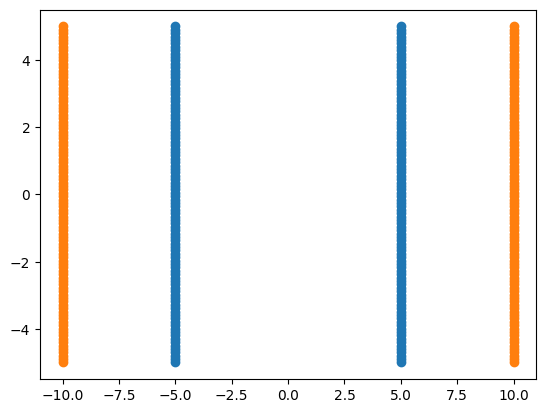

In [53]:
plt.scatter(y1,x1)
plt.scatter(y,x)

In [54]:
df1 = pd.DataFrame(np.vstack([y,x]).T, columns=["X1","X2"])
df1["Y"]=0
df2 = pd.DataFrame(np.vstack([y1,x1]).T, columns=["X1","X2"])
df2["Y"]=1

df = pd.concat([df1, df2])
df.head()

,X1,X2,Y
0,10.0,-5.00000,0
1,10.0,-4.89899,0
2,10.0,-4.79798,0
3,10.0,-4.69697,0
4,10.0,-4.59596,0


In [55]:
df.tail()

,X1,X2,Y
195,-5.0,-4.59596,1
196,-5.0,-4.69697,1
197,-5.0,-4.79798,1
198,-5.0,-4.89899,1
199,-5.0,-5.00000,1


In [56]:
X=df[["X1","X2"]]
Y=df[["Y"]]

In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=10, test_size=0.25)

In [58]:
df["X1_Square"] = df["X1"]**2
df["X2_Square"] = df["X2"]**2
df["X1*X2"] = (df["X1"]*df["X2"])
df.head()


,X1,X2,Y,X1_Square,X2_Square,X1*X2
0,10.0,-5.00000,0,100.0,25.000000,-50.000000
1,10.0,-4.89899,0,100.0,24.000102,-48.989899
2,10.0,-4.79798,0,100.0,23.020610,-47.979798
3,10.0,-4.69697,0,100.0,22.061524,-46.969697
4,10.0,-4.59596,0,100.0,21.122845,-45.959596


In [59]:
#Independent and Dependent Features
X=df[["X1", "X2",	"X1_Square",	"X2_Square",	"X1*X2",]]
Y=df["Y"]

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=10, test_size=0.25)

In [61]:
!pip install plotly


[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [62]:
import plotly.express as px
fig = px.scatter_3d(df, x="X1",y="X2",z="X1*X2",color="Y")
fig.show() 

In [64]:
import plotly.express as px
fig = px.scatter_3d(df, x="X1_Square",y="X2_Square",z="X1*X2",color="Y")
fig.show() 

In [68]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel="linear")
classifier.fit(X_train,Y_train)
Y_pred = classifier.predict(X_test)

In [69]:
accuracy_score(Y_test,Y_pred)

1.0